## Libraries

In [353]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans

## Data

In [354]:
dataset=pd.read_csv('C:/Users/Cristina/Desktop/Machine Learning/Week 2/Song Analysis/top50.csv', encoding='latin-1')
dataset.rename(columns = {'Unnamed: 0' : 'Number'}, inplace=True)
print(dataset.head(10))

   Number                         Track.Name    Artist.Name           Genre  \
0       1                           Senorita   Shawn Mendes    canadian pop   
1       2                              China       Anuel AA  reggaeton flow   
2       3      boyfriend (with Social House)  Ariana Grande       dance pop   
3       4    Beautiful People (feat. Khalid)     Ed Sheeran             pop   
4       5        Goodbyes (Feat. Young Thug)    Post Malone         dfw rap   
5       6  I Don't Care (with Justin Bieber)     Ed Sheeran             pop   
6       7                             Ransom      Lil Tecca      trap music   
7       8                  How Do You Sleep?      Sam Smith             pop   
8       9              Old Town Road - Remix      Lil Nas X     country rap   
9      10                            bad guy  Billie Eilish      electropop   

   Beats.Per.Minute  Energy  Danceability  Loudness..dB..  Liveness  Valence.  \
0               117      55            76        

In [355]:
dataset.isnull().any()

Number              False
Track.Name          False
Artist.Name         False
Genre               False
Beats.Per.Minute    False
Energy              False
Danceability        False
Loudness..dB..      False
Liveness            False
Valence.            False
Length.             False
Acousticness..      False
Speechiness.        False
Popularity          False
dtype: bool

array([[<AxesSubplot:title={'center':'Number'}>,
        <AxesSubplot:title={'center':'Beats.Per.Minute'}>,
        <AxesSubplot:title={'center':'Energy'}>],
       [<AxesSubplot:title={'center':'Danceability'}>,
        <AxesSubplot:title={'center':'Loudness..dB..'}>,
        <AxesSubplot:title={'center':'Liveness'}>],
       [<AxesSubplot:title={'center':'Valence.'}>,
        <AxesSubplot:title={'center':'Length.'}>,
        <AxesSubplot:title={'center':'Acousticness..'}>],
       [<AxesSubplot:title={'center':'Speechiness.'}>,
        <AxesSubplot:title={'center':'Popularity'}>, <AxesSubplot:>]],
      dtype=object)

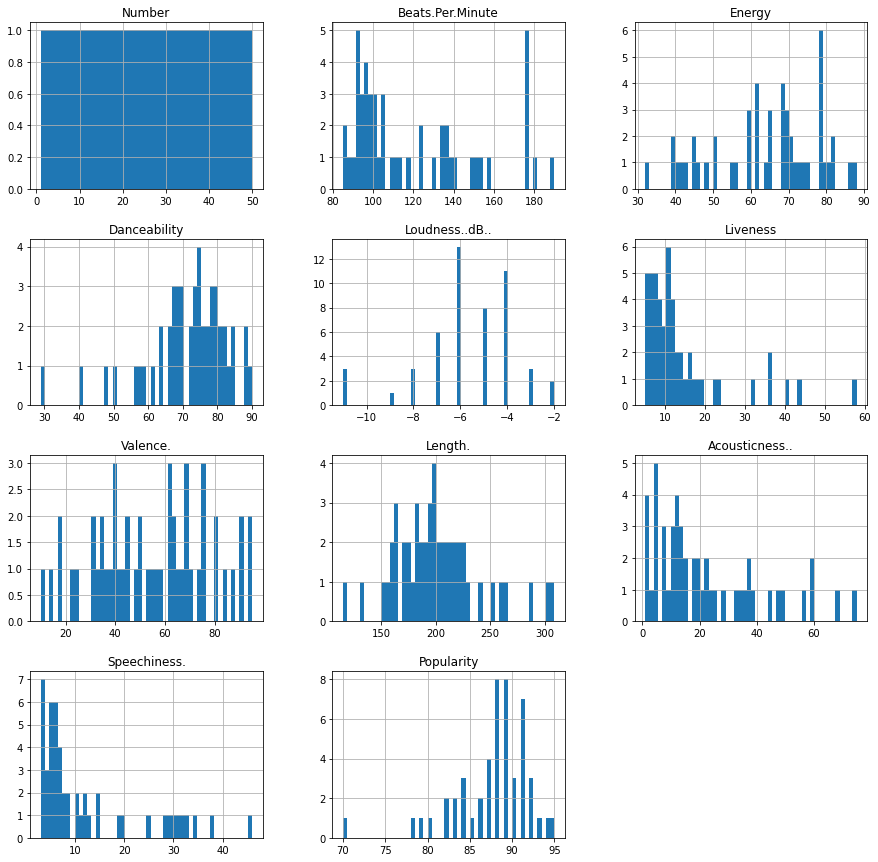

In [356]:
dataset.hist(figsize=(15,15), bins=50)

## Clustering: K-Means

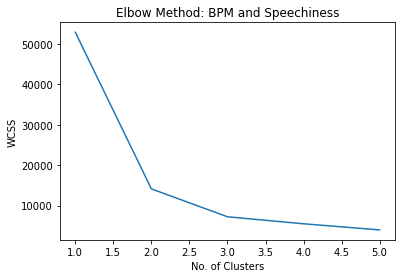

In [357]:
X=dataset.iloc[:, 4:].values
WCSS=[]
for i in range(1, 6):
    kmeans=KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X[:, (0, 8)])
    WCSS.append(kmeans.inertia_)
plt.plot(range(1,6), WCSS)
plt.title('Elbow Method: BPM and Speechiness')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

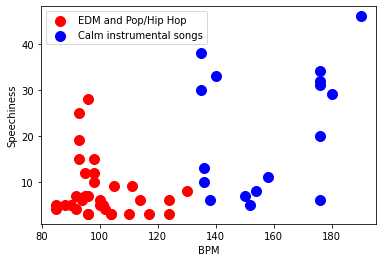

In [358]:
kmeans=KMeans(n_clusters=2, init='k-means++')
y_kmeans=kmeans.fit_predict(X[:, (0, 8)])
plt.scatter(X[:, (0, 8)][y_kmeans == 0, 0], X[:, (0, 8)][y_kmeans == 0, 1], s = 100, c = 'red', label = 'Calm instrumental songs')
plt.scatter(X[:, (0, 8)][y_kmeans == 1, 0], X[:, (0, 8)][y_kmeans == 1, 1], s = 100, c = 'blue', label = 'EDM and Pop/Hip Hop')
plt.xlabel('BPM')
plt.ylabel('Speechiness')
plt.legend()
plt.show()

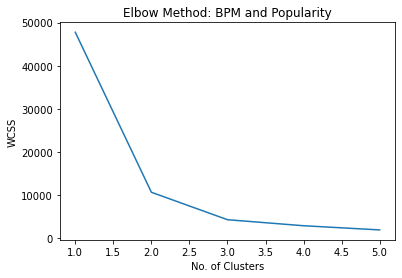

In [359]:
WCSS=[]
for i in range(1, 6):
    kmeans=KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X[:, (0, 9)])
    WCSS.append(kmeans.inertia_)
plt.plot(range(1,6), WCSS)
plt.title('Elbow Method: BPM and Popularity')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

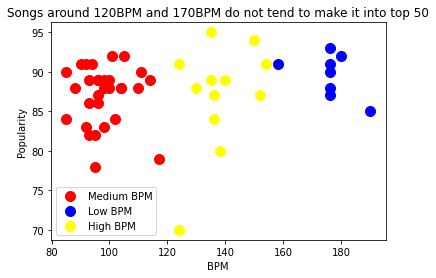

In [360]:
kmeans=KMeans(n_clusters=3, init='k-means++')
y_kmeans=kmeans.fit_predict(X[:, (0, 9)])
plt.scatter(X[:, (0, 9)][y_kmeans == 0, 0], X[:, (0, 9)][y_kmeans == 0, 1], s = 100, c = 'red', label = 'Medium BPM')
plt.scatter(X[:, (0, 9)][y_kmeans == 1, 0], X[:, (0, 9)][y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Low BPM')
plt.scatter(X[:, (0, 9)][y_kmeans == 2, 0], X[:, (0, 9)][y_kmeans == 2, 1], s = 100, c = 'yellow', label = 'High BPM')
plt.xlabel('BPM')
plt.ylabel('Popularity')
plt.title('Songs around 120BPM and 170BPM do not tend to make it into top 50')
plt.legend()
plt.show()

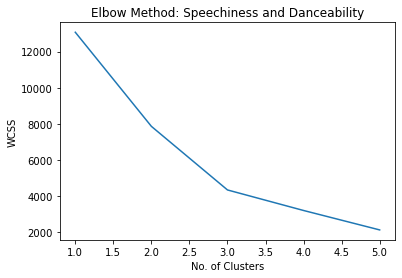

In [361]:
WCSS=[]
for i in range(1, 6):
    kmeans=KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X[:, (8, 2)])
    WCSS.append(kmeans.inertia_)
plt.plot(range(1,6), WCSS)
plt.title('Elbow Method: Speechiness and Danceability')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

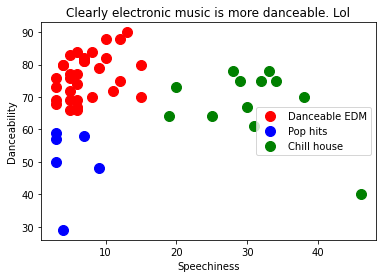

In [362]:
kmeans=KMeans(n_clusters=3, init='k-means++')
y_kmeans=kmeans.fit_predict(X[:, (8, 2)])
plt.scatter(X[:, (8, 2)][y_kmeans == 0, 0], X[:, (8, 2)][y_kmeans == 0, 1], s = 100, c = 'red', label = 'Danceable EDM')
plt.scatter(X[:, (8, 2)][y_kmeans == 1, 0], X[:, (8, 2)][y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Pop hits')
plt.scatter(X[:, (8, 2)][y_kmeans == 2, 0], X[:, (8, 2)][y_kmeans == 2, 1], s = 100, c = 'green', label = 'Chill house')
plt.xlabel('Speechiness')
plt.ylabel('Danceability')
plt.title('Clearly electronic music is more danceable. Lol')
plt.legend()
plt.show()

In [363]:
for i in range(0, 49):
    if y_kmeans[i] == 0:
        print(dataset.iloc[i, 1])

Senorita
China
I Don't Care (with Justin Bieber)
Old Town Road - Remix
Loco Contigo (feat. J. Balvin & Tyga)
Money In The Grave (Drake ft. Rick Ross)
No Guidance (feat. Drake)
Sunflower - Spider-Man: Into the Spider-Verse
Lalala
Truth Hurts
Piece Of Your Heart
Panini
No Me Conoce - Remix
Soltera - Remix
If I Can't Have You
Dance Monkey
It's You
Con Calma
The London (feat. J. Cole & Travis Scott)
Never Really Over
Summer Days (feat. Macklemore & Patrick Stump of Fall Out Boy)
Antisocial (with Travis Scott)
Sucker
fuck, i'm lonely (with Anne-Marie) - from 13 Reasons Why: Season 3
Higher Love
You Need To Calm Down
Talk
Con Altura
One Thing Right
Te Robaré
Happier


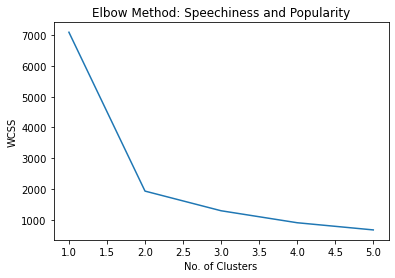

In [364]:
WCSS=[]
for i in range(1, 6):
    kmeans=KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X[:, (8, 9)])
    WCSS.append(kmeans.inertia_)
plt.plot(range(1,6), WCSS)
plt.title('Elbow Method: Speechiness and Popularity')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

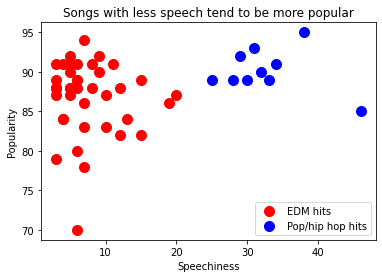

In [365]:
kmeans=KMeans(n_clusters=2, init='k-means++')
y_kmeans=kmeans.fit_predict(X[:, (8, 9)])
plt.scatter(X[:, (8, 9)][y_kmeans == 0, 0], X[:, (8, 9)][y_kmeans == 0, 1], s = 100, c = 'red', label = 'EDM hits')
plt.scatter(X[:, (8, 9)][y_kmeans == 1, 0], X[:, (8, 9)][y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Pop/hip hop hits')
plt.xlabel('Speechiness')
plt.ylabel('Popularity')
plt.title('Songs with less speech tend to be more popular')
plt.legend()
plt.show()